[Question 3]
Implement a locally weighted linear regression model for the data from Question 1. Refer to Slide 33
from Lecture 4 for reference. You should implement your own version of linear regression either using
gradient descent or normal equations. You SHOULD NOT use any pre-packaged library such as
Sci-Kit Learn.
Answer the following questions:
1. Do you need any basis functions when using the locally weighted approach?
2. What is the difference between this implementation and the one for Question 1?
Submission Requirements:
You will need to submit the following as a single ZIP file:
1. A short report detailing your work and answers to the questions presented above.
2. The link to your code on Github as a IPython notebook that can be run on Google Colab.
3. A README file on any dependencies that are required to run your code.
Note:
1. If your code does not run on Colab, you will not get any credit for the code segment. We will
only grade what is in your report.
a. This includes any syntax errors due to indentation, unnamed/unknown libraries that
were not listed in the README file, etc.
2. Please submit code only in Python and in the IPython notebook format. You can write your
answers as part of the notebook if you do not want a separate report file, but it must be
comprehensive.
a. Any code not in Python will not be graded at all.

In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import copy

In [2]:
# Load data
x_train = np.load('x_train.npy')
y_train = np.expand_dims(np.load('y_train.npy'), axis=1)
x_test = np.load('x_test.npy') 
y_test = np.load('y_test.npy')

In [3]:
# Weight Matrix in code. It is a diagonal matrix.
def wm(point, X, tau): 
    
  # tau --> bandwidth
  # X --> Training data.
  # point --> the x where we want to make the prediction.
    
  # m is the No of training examples .
    m = X.shape[0] 
    
  # Initialising W as an identity matrix.
    w = np.mat(np.eye(m)) 
    
  # Calculating weights for all training examples [x(i)'s].
    for i in range(m): 
        xi = X[i] 
        d = (-2 * tau * tau) 
        w[i, i] = np.exp(np.dot((xi-point), (xi-point).T)/d) 
        
    return w

In [4]:
def predict(X, y, point, tau): 
    
   # m = number of training examples. 
    m = X.shape[0] 
    
   # Appending a cloumn of ones in X to add the bias term.
## # Just one parameter: theta, that's why adding a column of ones        #### to X and also adding a 1 for the point where we want to          #### predict. 
    X_ = np.append(X, np.ones(m).reshape(m,1), axis=1) 
    
   # point is the x where we want to make the prediction. 
    point_ = np.array([point, 1]) 
    
   # Calculating the weight matrix using the wm function we wrote      #  # earlier. 
    w = wm(point_, X_, tau) 
    
  # Calculating parameter theta using the formula.
    theta = np.linalg.pinv(X_.T*(w * X_))*(X_.T*(w * y)) 
    
  # Calculating predictions.  
    pred = np.dot(point_, theta) 
    
   # Returning the theta and predictions 
    return theta, pred

In [6]:
def plot_predictions(X, y, tau, nval):
   # X --> Training data. 
   # y --> Output sequence.
   # nval --> number of values/points for which we are going to
   # predict.
   # tau --> the bandwidth.     
    # The values for which we are going to predict.
   # X_test includes nval evenly spaced values in the domain of X.
    X_test = np.linspace(-3, 3, nval) 
    
   # Empty list for storing predictions. 
    preds = [] 
    
   # Predicting for all nval values and storing them in preds. 
    for point in X_test: 
        theta, pred = predict(X, y, point, tau) 
        preds.append(pred)
        
   # Reshaping X_test and preds
    X_test = np.array(X_test).reshape(nval,1)
    preds = np.array(preds).reshape(nval,1)
    
   # Plotting 
    plt.plot(X, y, 'b.')
    plt.plot(X_test, preds, 'r.') # Predictions in red color.
    plt.show()

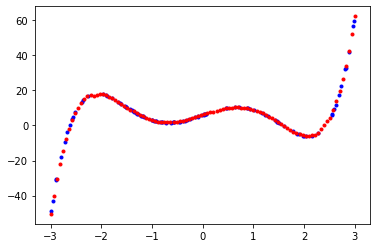

In [7]:
plot_predictions(x_train, y_train, 0.08, 100)

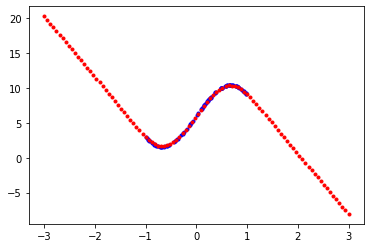

In [8]:
plot_predictions(x_test, y_test, 0.08, 100)